In [1]:
from __future__ import division
%matplotlib inline
import pandas
import matplotlib.pyplot as plt
import numpy
import seaborn
seaborn.set_context({"figure.figsize": (15, 10)})

Scer FF 13 / 59 0.2203
Scer RR 13 / 59 0.2203
Scer FR 17 / 59 0.2881
Scer RF 16 / 59 0.2712


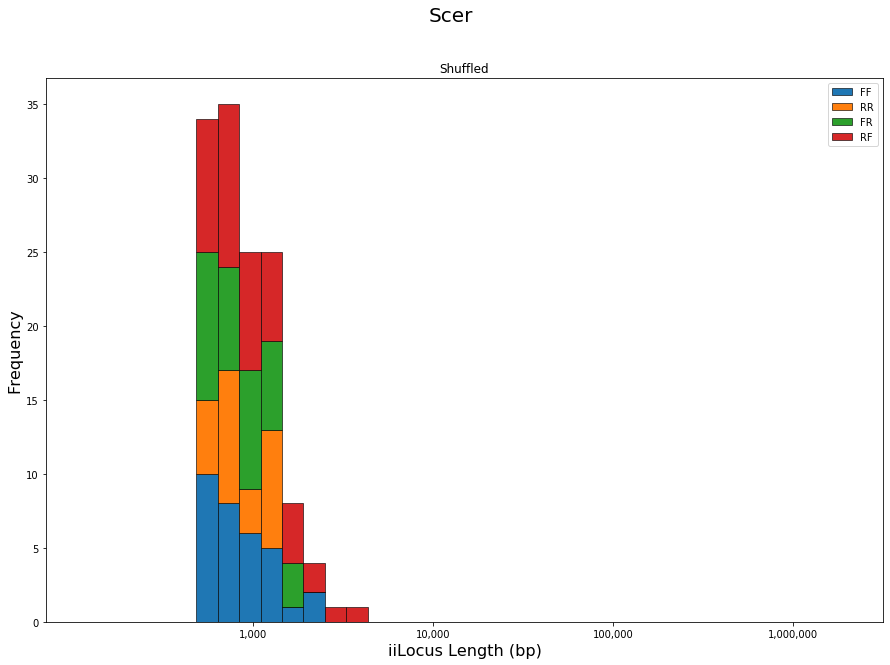

Cele FF 365 / 1339 0.2726
Cele RR 316 / 1339 0.2360
Cele FR 348 / 1339 0.2599
Cele RF 310 / 1339 0.2315


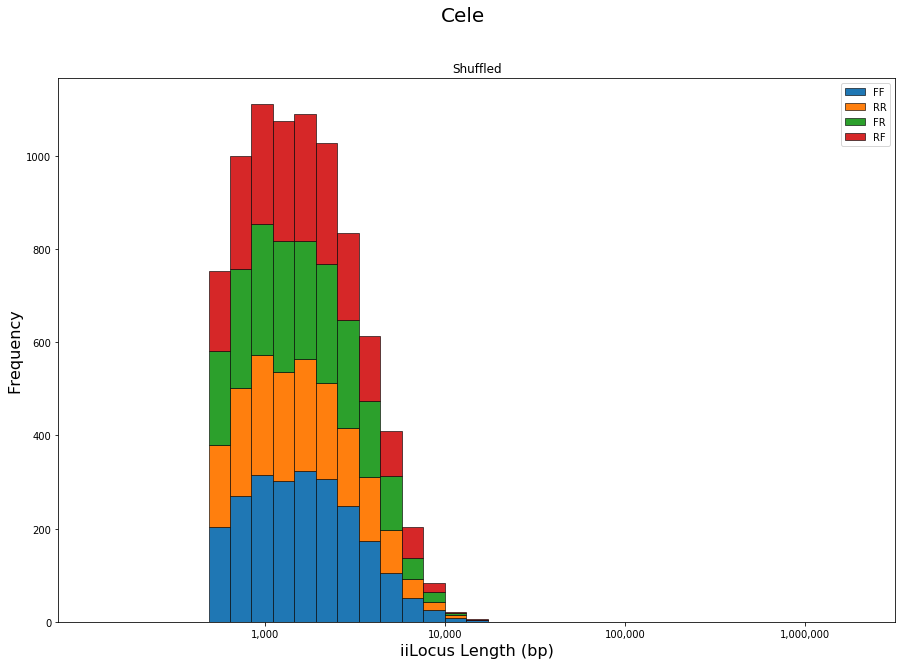

Crei FF 117 / 495 0.2364
Crei RR 119 / 495 0.2404
Crei FR 133 / 495 0.2687
Crei RF 126 / 495 0.2545


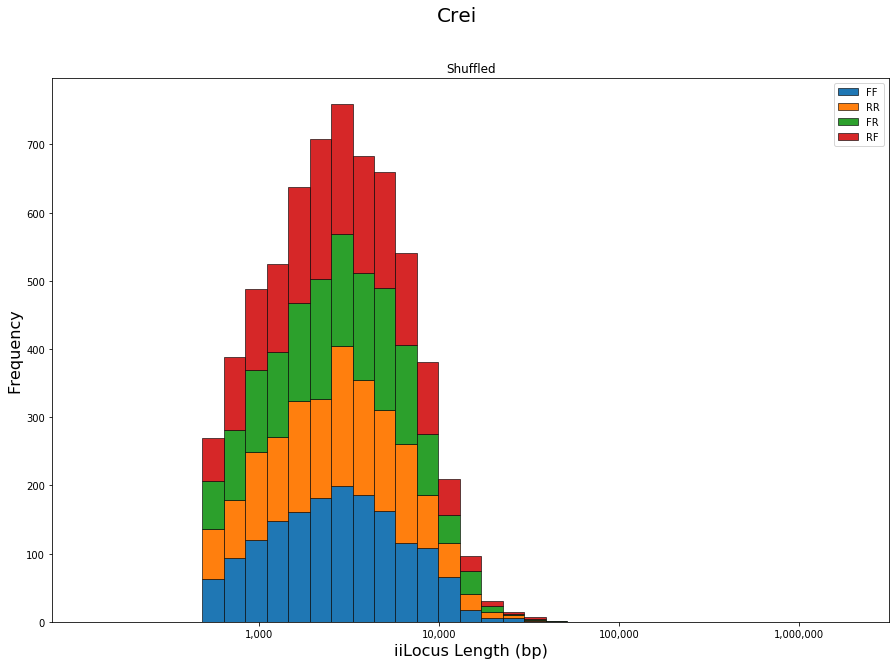

Mtru FF 422 / 1706 0.2474
Mtru RR 443 / 1706 0.2597
Mtru FR 428 / 1706 0.2509
Mtru RF 413 / 1706 0.2421


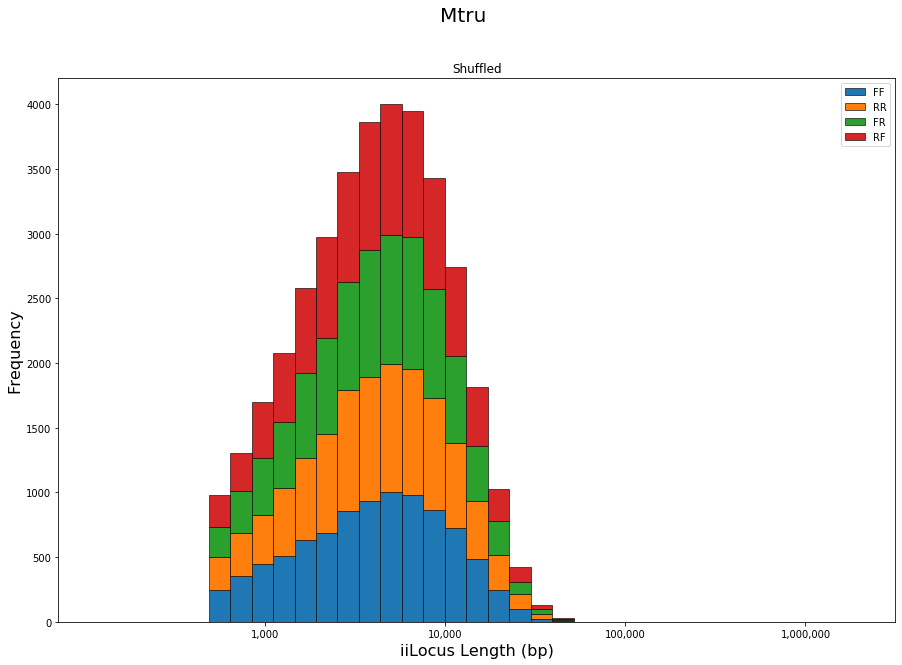

Agam FF 46 / 191 0.2408
Agam RR 47 / 191 0.2461
Agam FR 54 / 191 0.2827
Agam RF 44 / 191 0.2304


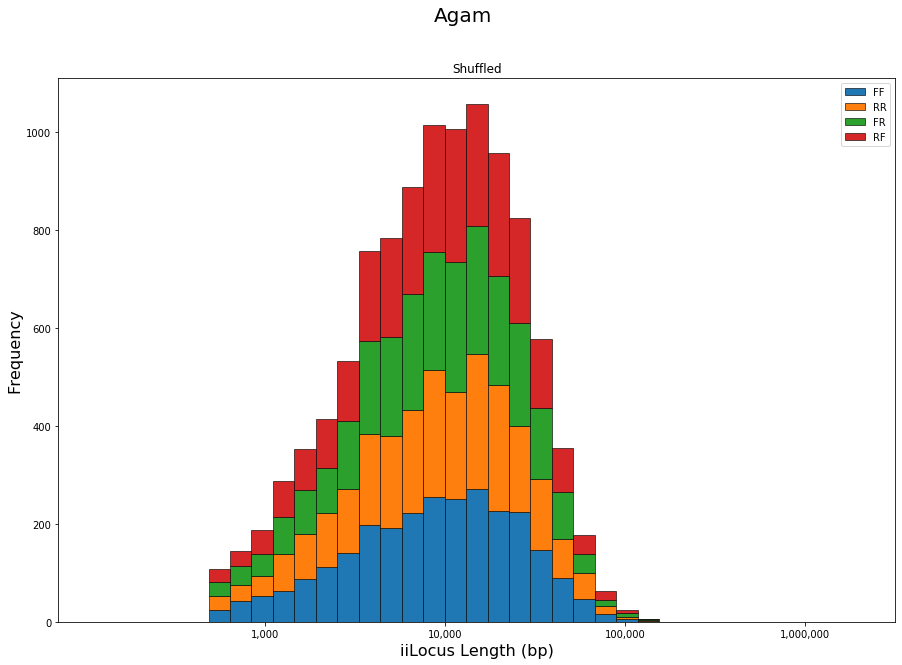

Dmel FF 165 / 546 0.3022
Dmel RR 111 / 546 0.2033
Dmel FR 129 / 546 0.2363
Dmel RF 141 / 546 0.2582


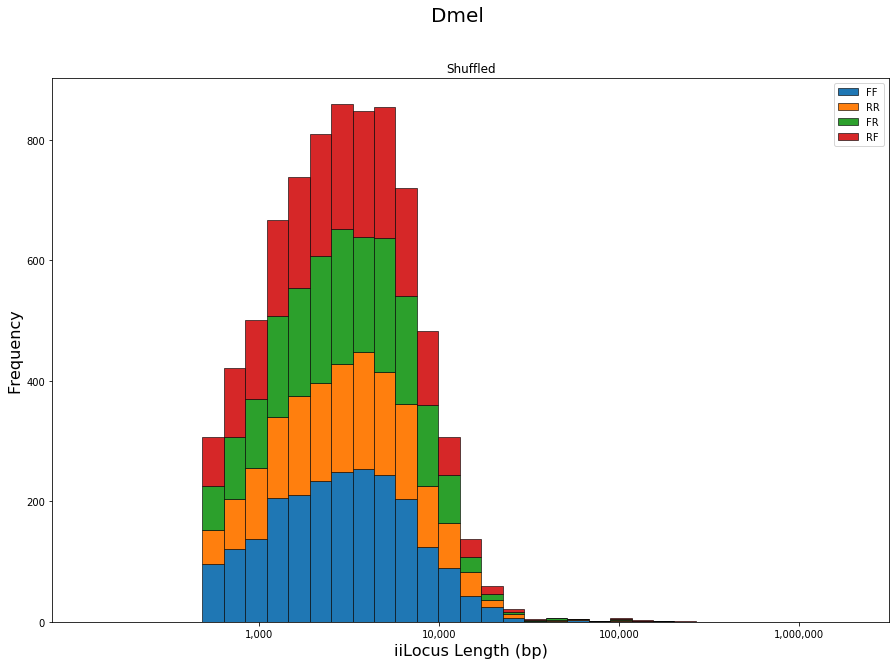

Xtro FF 50 / 172 0.2907
Xtro RR 34 / 172 0.1977
Xtro FR 40 / 172 0.2326
Xtro RF 48 / 172 0.2791


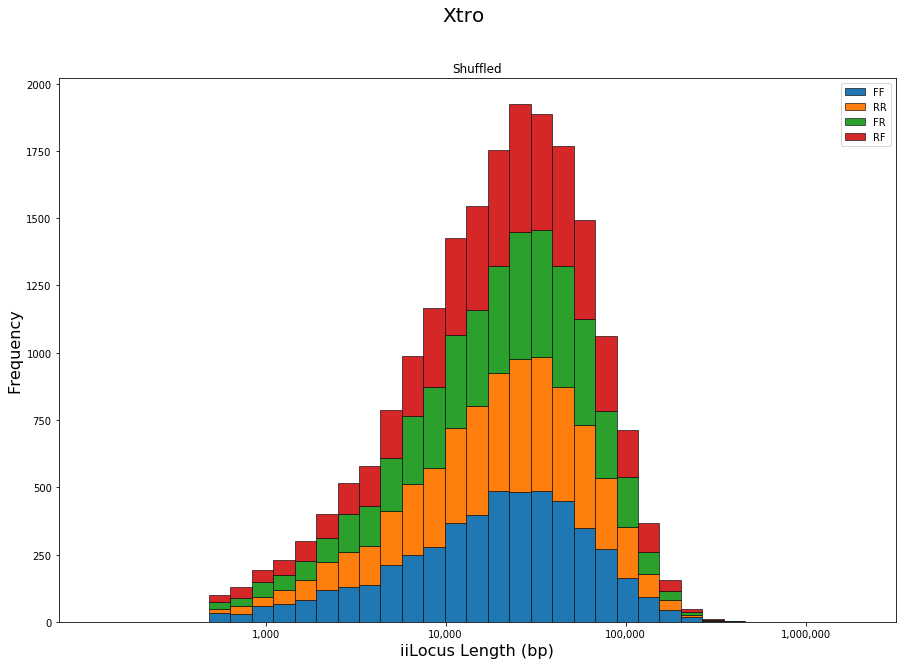

Drer FF 152 / 574 0.2648
Drer RR 130 / 574 0.2265
Drer FR 150 / 574 0.2613
Drer RF 142 / 574 0.2474


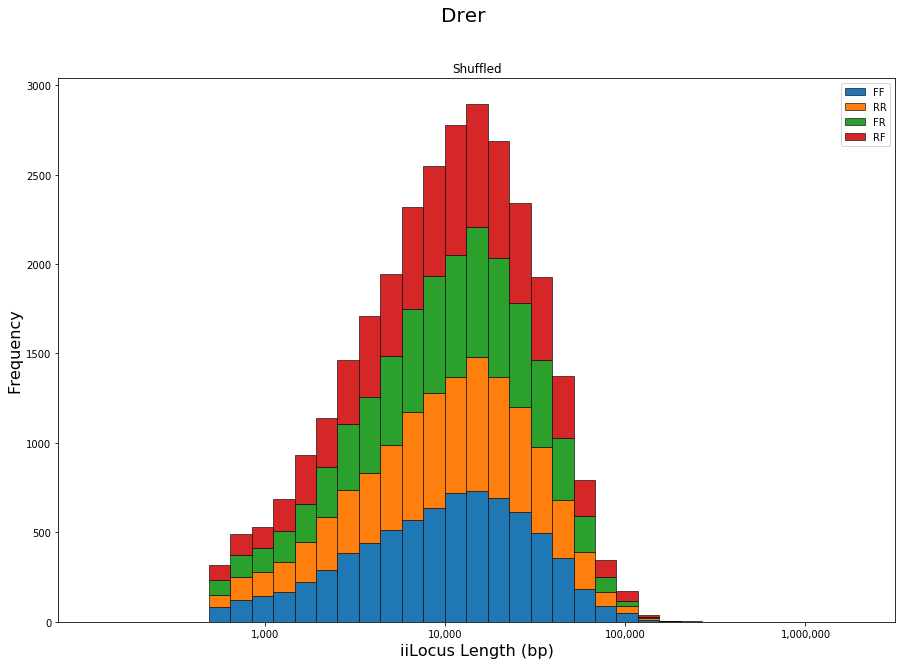

Mmus FF 30 / 158 0.1899
Mmus RR 49 / 158 0.3101
Mmus FR 44 / 158 0.2785
Mmus RF 35 / 158 0.2215


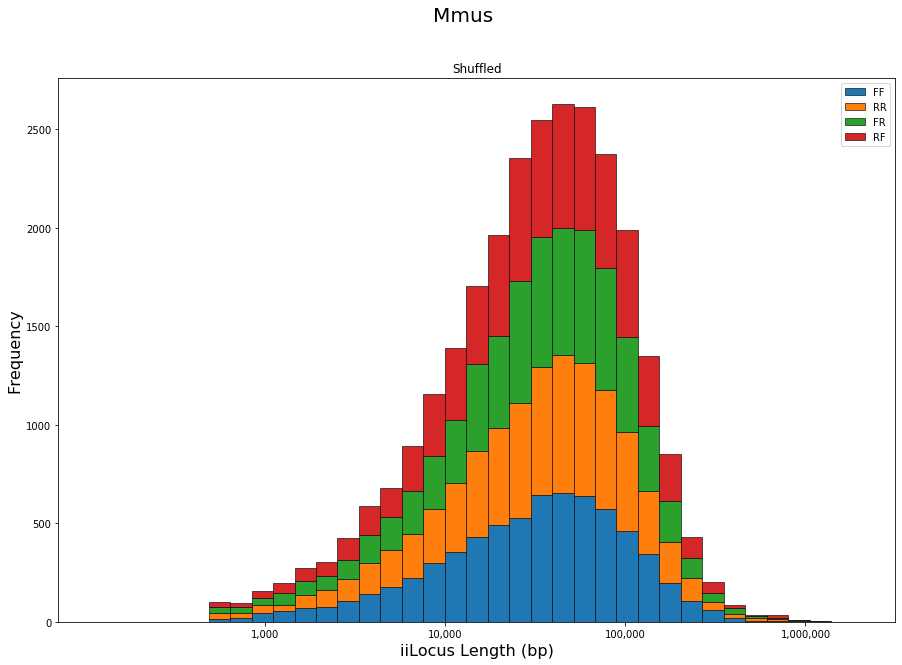

Hsap FF 28 / 123 0.2276
Hsap RR 35 / 123 0.2846
Hsap FR 36 / 123 0.2927
Hsap RF 24 / 123 0.1951


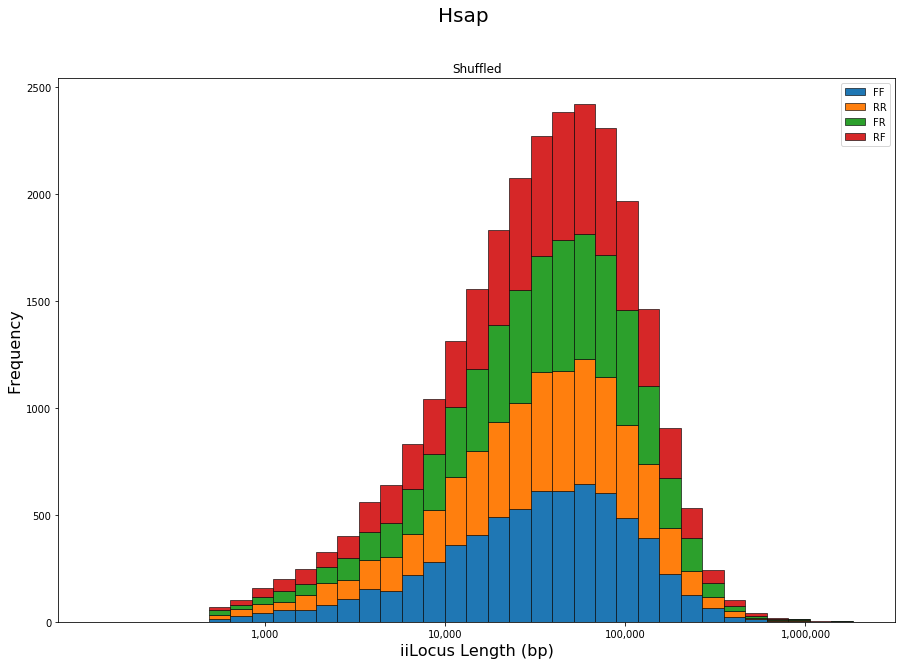

In [2]:
orientations = ['FF', 'RR', 'FR', 'RF']
datasource = "shuffled" #set to shuffled for shuffled data input

for species in ['Scer', 'Cele', 'Crei', 'Mtru', 'Agam', 'Dmel', 'Xtro', 'Drer', 'Mmus', 'Hsap']:
    if (datasource == 'shuffled'):
      datafile = 'data/{}/{}.iloci.shuffled.tsv'.format(species,species)
    else:
      datafile = 'data/{}/{}.iloci.tsv'.format(species,species)
    data = pandas.read_csv(datafile,sep='\t')
    data['LogLength'] = numpy.log10(data['Length'])
    
    iiloci = data.loc[data.LocusClass == 'iiLocus']
    short = iiloci.loc[iiloci.Length < 750]
    subsets = list()
    shufsubsets = list()
    for orient in orientations:
        # subset = iiloci.loc[(iiloci.FlankGeneOrient == orient) & (iiloci.Length > 10000)]
        subset = iiloci.loc[(iiloci.FlankGeneOrient == orient)]
        subsets.append(subset['LogLength'])
        shortsubset = short.loc[short.FlankGeneOrient == orient]
        print(species, orient, '{} / {}'.format(len(shortsubset), len(short)), '{:.4f}'.format(len(shortsubset) / len(short)))

    fig, axis = plt.subplots()
    _ = plt.hist(subsets, stacked=True, bins=numpy.log10(numpy.logspace(1.85, 6.5, 40)), label=orientations, edgecolor='black', linewidth=0.6)
    if (datasource == 'shuffled'):
      _ = plt.title('Shuffled')
    else:
      _ = plt.title('Observed')
    _ = plt.legend()
    #_ = plt.subplot(122)
    #_ = plt.hist(shufsubsets, stacked=True, bins=20, label=orientations)
    _ = axis.set_xlabel('iiLocus Length (bp)', fontsize=16)
    _ = axis.set_ylabel('Frequency', fontsize=16)
    _ = axis.set_xlim((1.85, 6.5))
    _ = axis.set_xticks([3, 4, 5, 6])
    _ = axis.set_xticklabels(['1,000', '10,000', '100,000', '1,000,000'])
    _ = plt.suptitle(species, fontsize=20)
    plotfile = "figures/LSB20GB-SuppFig3_%s%s.png" % (species, datasource)
    plt.savefig(plotfile)
    _ = plt.show()

In [3]:
numpy.logspace(2, 6.5, 25)

array([1.00000000e+02, 1.53992653e+02, 2.37137371e+02, 3.65174127e+02,
       5.62341325e+02, 8.65964323e+02, 1.33352143e+03, 2.05352503e+03,
       3.16227766e+03, 4.86967525e+03, 7.49894209e+03, 1.15478198e+04,
       1.77827941e+04, 2.73841963e+04, 4.21696503e+04, 6.49381632e+04,
       1.00000000e+05, 1.53992653e+05, 2.37137371e+05, 3.65174127e+05,
       5.62341325e+05, 8.65964323e+05, 1.33352143e+06, 2.05352503e+06,
       3.16227766e+06])